## Assignment - TOTAL 15 Marks

In [27]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

import seaborn as sns

### Read the dataset

In [28]:
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [29]:
# No missing data and "country" data type is object.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## 1. Drop the 'country' column and standardize the remaining features. Marks: 1


In [30]:
features = data.drop(['country'], axis=1)
features.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [31]:
features.info()     # Remaining are all numerical data.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


## 2. Use PCA to reduce the dimensions, using an appropriate number of components to capture at least 90% variation of data. You may try using a loop, or just trial an error to find the n_components. Marks: 3



In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [33]:
sc = StandardScaler()
df_scaled =  sc.fit_transform(features)

In [34]:
pca = PCA(5)             # Start with 2, at n_component 5 variation greater 90%
df_p = pca.fit_transform(df_scaled)
df_p.shape

(167, 5)

In [35]:
pca.explained_variance_ratio_    # result with n_componet 5 is 94.52%.


array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211])

In [36]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662]])

## 3. Using the number of components from above, display your dataset with its principal components in a dataframe. Inspect the dataframe with head(). Marks: 2

In [37]:
df = pd.DataFrame(data = df_p, columns = ['PC-1', 'PC-2', 'PC-3', 'PC-4', 'PC-5'])

In [38]:
df.head()

,PC-1,PC-2,PC-3,PC-4,PC-5
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007


## 4. We will use k-means clustering on the new set of PCs. Use inertia and elbow method to find the optimal k to use for clustering. Use a plot to visualize which k to use. Marks: 4






In [39]:
from sklearn.cluster import KMeans, k_means

In [40]:
model = KMeans(random_state=123, init='k-means++').fit(df)

In [41]:
predicted = model.labels_
centroids = model.cluster_centers_

In [42]:
df['predicted_cluster'] = predicted
df.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,predicted_cluster
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,4
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,7
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,2
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,4
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,7


In [50]:
model.inertia_   

380.51615719645037

In [52]:
# Used inertia: Best result with n_clusters = 2.

model2 = KMeans(n_clusters=2, random_state=123, init='k-means++').fit(df)
model2.inertia_      

1553.094513269185

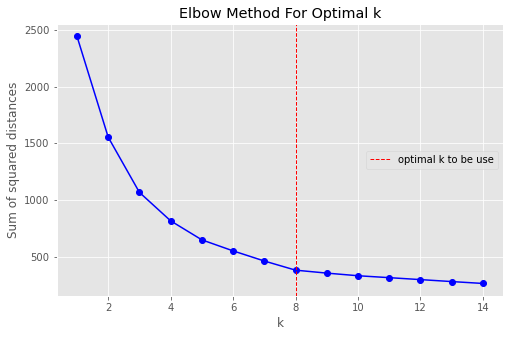

In [53]:
# Used Elbow Method plot: Optimal k = 8 to be use.

fig, ax = plt.subplots(figsize=(8,5))

Inertia_list = []
K = range(1, 15)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Inertia_list.append(km.inertia_)    
    
plt.plot(K, Inertia_list, 'bo-')  
ax.set(title = 'Elbow Method For Optimal k', xlabel='k', ylabel ='Sum of squared distances') 
ax.axvline(x = 8, label = "optimal k to be use", linestyle = '--', linewidth = 1, color = 'r') 
ax.legend(loc = 5);


## 5. Find the silhouette score for the k you used above. Marks: 2

In [54]:
from sklearn.metrics import silhouette_score

In [55]:
# The silhouette score for k is 50.77%

score = silhouette_score(df, predicted, metric='euclidean')
score

0.5077429229347296

## 6. Try using DBSCAN instead. Set epsilon as 1, min_samples as 10. Calculate the silhouette score again. Marks: 3

In [56]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
from sklearn import metrics

iris = load_iris()
X, y = iris.data, iris.target

In [57]:
db = DBSCAN(eps=1, min_samples=10).fit(df)

core_samples = db.core_sample_indices_
labels = db.labels_

In [58]:
labels = db.labels_
np.unique(labels)


array([-1,  0,  1,  2], dtype=int64)

In [60]:
# Calculating silhouette score with clusters labeled is >=0
# Using DBSCAN is better, result is 69.13% now.

labels_filtered = labels[np.where(labels>=0)]
df_filtered = df.values[np.where(labels>=0)]

metrics.silhouette_score(df_filtered, labels_filtered)

0.6913293801402796